Utilizaremos un set de datos de las policias de New York del año 2009 y
2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información
de los procedimientos policiales realizados. Además se le entregará el
diccionario de variables para que pueda consultar que significa cada
categoría dentro de las variables.
● La variable respuesta 'arstmade' informa si los procedimientos policiales
han terminado en arresto o no, y el objetivo será realizar un modelo de
Machine Learning para predecir si un futuro procedimiento terminará en
arresto.

In [1]:
#importaciones y set up
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df2009 = pd.read_csv('2009_1perc.csv')
df2010 = pd.read_csv('2010_1perc.csv')

procedures = pd.concat([df2009, df2010], ignore_index=True)



In [2]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(16), object(95)
memory usage: 10.1+ MB


In [3]:
procedures.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11825.0,2.959838e+05,1.708207e+05,52.0,147515.0,296652.0,443097.0,601281.0
year,11825.0,2.009508e+03,4.999489e-01,2009.0,2009.0,2010.0,2010.0,2010.0
pct,11825.0,6.862562e+01,3.303783e+01,1.0,42.0,73.0,102.0,123.0
ser_num,11825.0,5.697994e+03,5.152486e+03,1.0,2002.0,4366.0,7840.0,31694.0
datestop,11825.0,6.364221e+06,3.429091e+06,1012009.0,3232009.0,6162010.0,9232009.0,12312010.0
timestop,11825.0,1.413725e+03,7.447264e+02,0.0,1000.0,1605.0,2035.0,2830.0
perobs,11825.0,2.654391e+00,9.759031e+00,0.0,1.0,1.0,3.0,926.0
perstop,11825.0,5.649556e+00,9.758535e+00,1.0,3.0,5.0,5.0,857.0
compyear,11825.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
comppct,11825.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


3.- Preprocesamiento de datos
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los
siguientes pasos para limpiar este set:

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [4]:
#utilidades para determinar variables categoricas
def count_freq(df, selected_columns):
    return {i: df[i].unique().shape[0] for i in selected_columns}
def infer_datatype(df, datatype, drop_none=True):
    tmp_list = [i if df[i].dtype == datatype else None for i in df.columns]
    if drop_none is True:
        tmp_list = list(filter(lambda x: x != None, tmp_list))

    return tmp_list

#determinar variables categoricas

object_data_type = infer_datatype(procedures, 'object')
integer_data_type = infer_datatype(procedures, 'int')
float_data_type = infer_datatype(procedures, 'float')

object_unique_vals = count_freq(procedures, object_data_type)
int_unique_vals = count_freq(procedures, integer_data_type)
float_unique_vals = count_freq(procedures, float_data_type)

ListaVariableCategorica = dict(filter(lambda x: x[1] < 100 and x[1] >= 2, object_unique_vals.items()))
ListaVariableCategorica = list(ListaVariableCategorica.keys())
ListaVariableCategorica

['recstat',
 'inout',
 'trhsloc',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'sumissue',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'sex',
 'race',
 'haircolr',
 'eyecolor',
 'build',
 'addrtyp',
 'city',
 'sector',
 'beat',
 'dettypcm',
 'linecm']

-  3.2 Reemplaze las siguientes clases faltantes: 
    - Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'

In [5]:
procedures['race'].values

array(['B', 'A', 'Q', ..., 'W', 'Q', 'B'], dtype=object)

In [6]:
procedures['officrid'] = procedures['officrid'].fillna('N').apply(lambda x: 'N' if x != 'Y' else x)
procedures['offshld'] = procedures['offshld'].fillna('N').apply(lambda x: 'N' if x != 'Y' else x)
procedures['offverb'] = procedures['offverb'].fillna('N').apply(lambda x: 'N' if x != 'Y' else x)
procedures['officrid'].values

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

-Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA,
dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso
contrario mantenga su valor
Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [7]:
procedures['sector'].values

array(['G', 'J', 'E', ..., 'E', 'E', 'H'], dtype=object)

In [8]:
procedures['sector'] = procedures['sector'].fillna('U')
procedures['trhsloc'] = procedures['trhsloc'].fillna('U')
procedures['beat'] = procedures['beat'].fillna('U')
procedures['sector'].values

array(['G', 'J', 'E', ..., 'E', 'E', 'H'], dtype=object)

- 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [9]:
procedures['ht_meters'] = (procedures['ht_feet'] + procedures['ht_inch']) * 0.3048
procedures['ht_meters'].values


array([4.2672, 3.048 , 2.7432, ..., 1.8288, 4.8768, 2.1336])

- 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente. Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/

In [10]:
procedures['datestop'] = pd.to_datetime(procedures['datestop'], format='%m%d%Y')
procedures['datestop_year'] = procedures['datestop'].dt.year
procedures['datestop_month'] = procedures['datestop'].dt.month


3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto
3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas
edades esten entre 18 y 100 años, ambos inclusive.

In [11]:
filtered_df = procedures[[*ListaVariableCategorica, 'datestop_month', 'datestop_year', 'age']][(procedures['age'] >= 18) & (procedures['age'] <= 100)]
filtered_df.shape

(10078, 77)

Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

In [12]:
filtered_df['arstmade'].values

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

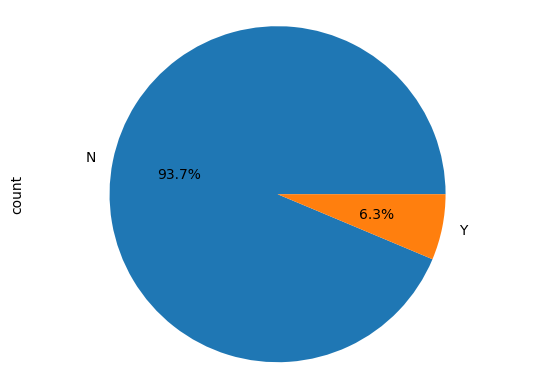

In [13]:
colors = sns.color_palette('pastel')[0:5]
value_counts = procedures['arstmade'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%',)
plt.axis('equal')  # Ensure pie chart is circular
plt.show()

Se puede observar que solo el 6.3% de los procedimientos terminan en arresto en mayores de edad. Por si solo este dato no nos da mucha informacion habria que balancearlo con otras variables o compararlo con otras epocas para analizar el como evoluciona, ademas de contrastarlo con coyonturas sociales que pueden afectar este valor para tener un analisis mas profundo.

In [14]:
#agrupar los datos para el grafico
grouped_counts = filtered_df.groupby('race')['arstmade'].value_counts()
grouped_counts = grouped_counts.reset_index().sort_values(by='count', ascending=False)
grouped_counts

,race,arstmade,count
2,B,N,5006
7,Q,N,2368
11,W,N,902
5,P,N,540
3,B,Y,336
0,A,N,279
13,Z,N,234
8,Q,Y,164
12,W,Y,72
9,U,N,66


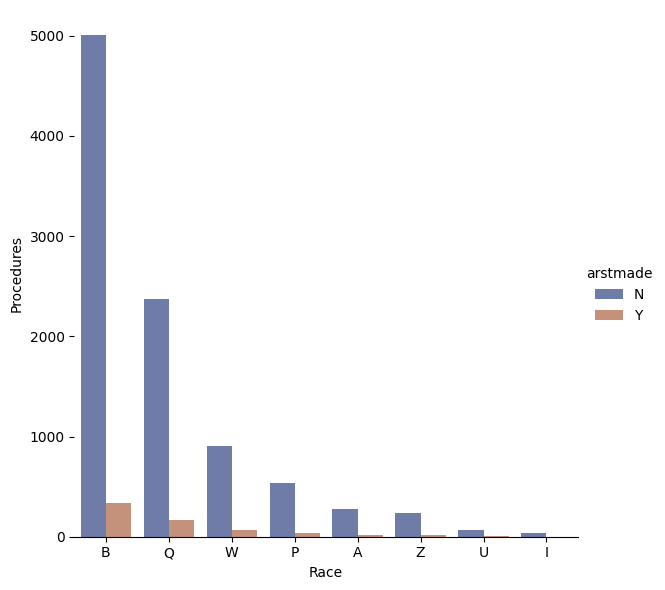

In [15]:
g = sns.catplot(
    data=grouped_counts, kind="bar",
    x="race", y="count", hue="arstmade",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Race", "Procedures")

Es observable la diferencia entre razas de los procedimientos realizados, en muchos casos puede ser el doble o mas las posibilidades de ser detenido dependiendo de la raza.
Esto podria indicar al menos usando solo este dato que hay un alto sezgo de ser detenido solo usando esta variable, seria interesante observar como contrasta este dato con
los otros si influye de alguna manera por ejemplo el lugar, edad o el tipo de procedimiento.

5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.
Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican
si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la
marca 'Y'.
Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de
las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje
de casos que terminaron con violencia.

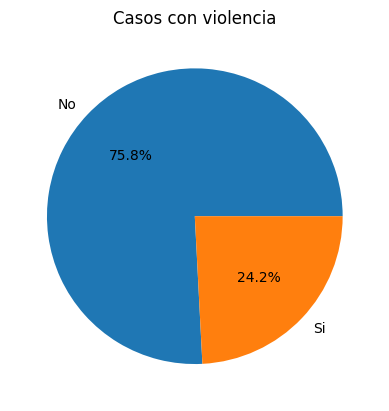

In [31]:
#criterios de violencia
#funcion para determinar si hubo accion violenta devuelve 1 sino devuelve 0
def is_violent(row):
    COLUMNS = ['pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other']
    for column in COLUMNS:
        if row[column] == 'Y':
            return 1
    return 0

filtered_df['violencia'] = filtered_df.apply(is_violent, axis=1)

grouped_counts = filtered_df['violencia'].value_counts()

total_count = grouped_counts.sum()
percentages = (grouped_counts / total_count) * 100

percentages_df = percentages.reset_index()
percentages_df.columns = ['Value', 'Percentage']
percentages_df['Value'] = percentages_df['Value'].replace({0: 'No', 1: 'Si'})

plt.pie(percentages_df['Percentage'], labels=percentages_df['Value'], autopct='%1.1f%%')

# Set title
plt.title('Casos con violencia')

# Display the plot
plt.show()